In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\may2\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

 ## Read the CSV and Perform Basic Data Cleaning     

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Select your features (columns)     

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(columns='koi_disposition')
y = df['koi_disposition']

In [6]:
y = pd.get_dummies(y)
y.head()

,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [7]:
print(X.shape, y.shape)

(6991, 40) (6991, 3)


## Create a Train Test Split     
*Use koi_disposition for the y values*

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)


## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

print(y_scaler)
print(X_scaler)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [16]:
# Transform the training and testing data using the X_scaler and y_scaler models
# X
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# y
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

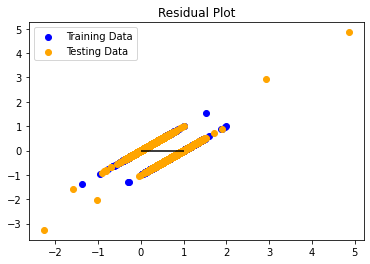

In [21]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

## Train the Model     
---------------

In [23]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.10908807023340371, R2: 0.475788183731892


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [31]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
lasso

MSE: 0.11372329035867078, R2: 0.4535140967903053


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

NameError: name 'model2' is not defined

## Hyperparameter Tuning     
*Use GridSearchCV to tune the model's parameters*

In [32]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.02, 0.03, 0.04],
              'tol': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(lasso, param_grid, verbose=3)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04],
                         'tol': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] alpha=0.01, tol=0.0001 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.41904873026982, tolerance: 0.0797993323795899
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.202955213384087, tolerance: 0.10483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' direc

[CV] .............. alpha=0.01, tol=0.0001, score=0.497, total=   0.5s
[CV] alpha=0.01, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.40730557080457, tolerance: 0.08052715784453979
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.03664849843129, tolerance: 0.10483509775870287
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' 

[CV] .............. alpha=0.01, tol=0.0001, score=0.505, total=   0.5s
[CV] alpha=0.01, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19641428111441428, tolerance: 0.10484883166428245
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.01, tol=0.0001, score=0.477, total=   0.6s
[CV] alpha=0.01, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11715830207106137, tolerance: 0.07990355184743744
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.01, tol=0.0001, score=0.486, total=   0.5s
[CV] alpha=0.01, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18335505566335542, tolerance: 0.07704471990464834
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11097034132859562, tolerance: 0.10487427890345644
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer '

[CV] .............. alpha=0.01, tol=0.0001, score=0.497, total=   0.5s
[CV] alpha=0.01, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.41904873026982, tolerance: 0.39899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.202955213384087, tolerance: 0.5241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' 

[CV] .............. alpha=0.01, tol=0.0005, score=0.497, total=   0.4s
[CV] alpha=0.01, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.40730557080457, tolerance: 0.40263578922269894
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.03664849843129, tolerance: 0.5241754887935143
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] .............. alpha=0.01, tol=0.0005, score=0.505, total=   0.8s
[CV] alpha=0.01, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.01, tol=0.0005, score=0.477, total=   0.4s
[CV] alpha=0.01, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.01, tol=0.0005, score=0.486, total=   0.4s
[CV] alpha=0.01, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.01, tol=0.0005, score=0.497, total=   0.6s
[CV] alpha=0.01, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.41904873026982, tolerance: 0.7979933237958989
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.202955213384087, tolerance: 1.0483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] ............... alpha=0.01, tol=0.001, score=0.497, total=   0.6s
[CV] alpha=0.01, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.40730557080457, tolerance: 0.8052715784453979
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.03664849843129, tolerance: 1.0483509775870286
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' us

[CV] ............... alpha=0.01, tol=0.001, score=0.505, total=   0.5s
[CV] alpha=0.01, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.01, tol=0.001, score=0.477, total=   0.4s
[CV] alpha=0.01, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.01, tol=0.001, score=0.486, total=   0.8s
[CV] alpha=0.01, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.01, tol=0.001, score=0.497, total=   0.4s
[CV] alpha=0.01, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.41904873026982, tolerance: 3.9899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.202955213384087, tolerance: 5.241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' us

[CV] ............... alpha=0.01, tol=0.005, score=0.497, total=   0.4s
[CV] alpha=0.01, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.40730557080457, tolerance: 4.026357892226989
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.03664849843129, tolerance: 5.241754887935143
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses

[CV] ............... alpha=0.01, tol=0.005, score=0.505, total=   0.5s
[CV] alpha=0.01, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.01, tol=0.005, score=0.477, total=   0.3s
[CV] alpha=0.01, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.01, tol=0.005, score=0.486, total=   0.3s
[CV] alpha=0.01, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4432703444982735, tolerance: 0.07610407725321894
  positive)


[CV] ............... alpha=0.01, tol=0.005, score=0.497, total=   0.3s
[CV] alpha=0.02, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.03570368326922, tolerance: 0.0797993323795899
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.00399285829329, tolerance: 0.10483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] .............. alpha=0.02, tol=0.0001, score=0.450, total=   0.5s
[CV] alpha=0.02, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12688642736924294, tolerance: 0.10483509775870287
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.02, tol=0.0001, score=0.454, total=   0.5s
[CV] alpha=0.02, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26905163535400334, tolerance: 0.08076738197424903
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6135944266462445, tolerance: 0.10484883166428245
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r

[CV] .............. alpha=0.02, tol=0.0001, score=0.430, total=   0.5s
[CV] alpha=0.02, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09201212685502469, tolerance: 0.07990355184743744
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8041117310625339, tolerance: 0.10487127532777127
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r

[CV] .............. alpha=0.02, tol=0.0001, score=0.440, total=   0.5s
[CV] alpha=0.02, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11160255801962649, tolerance: 0.07704471990464834
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24542308817166258, tolerance: 0.10487427890345644
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer '

[CV] .............. alpha=0.02, tol=0.0001, score=0.444, total=   0.6s
[CV] alpha=0.02, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.03570368326922, tolerance: 0.39899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.00399285829329, tolerance: 0.5241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] .............. alpha=0.02, tol=0.0005, score=0.450, total=   0.5s
[CV] alpha=0.02, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.02, tol=0.0005, score=0.454, total=   0.5s
[CV] alpha=0.02, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6135944266462445, tolerance: 0.5242441583214122
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.02, tol=0.0005, score=0.430, total=   0.5s
[CV] alpha=0.02, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8041117310625339, tolerance: 0.5243563766388564
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.02, tol=0.0005, score=0.440, total=   0.4s
[CV] alpha=0.02, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4432703444982735, tolerance: 0.7610407725321893
  positive)


[CV] .............. alpha=0.02, tol=0.0005, score=0.444, total=   0.4s
[CV] alpha=0.02, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.03570368326922, tolerance: 0.7979933237958989
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.00399285829329, tolerance: 1.0483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' us

[CV] ............... alpha=0.02, tol=0.001, score=0.450, total=   0.6s
[CV] alpha=0.02, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.001, score=0.454, total=   0.4s
[CV] alpha=0.02, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.001, score=0.430, total=   0.6s
[CV] alpha=0.02, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.001, score=0.440, total=   0.4s
[CV] alpha=0.02, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4432703444982735, tolerance: 3.8052038626609463
  positive)


[CV] ............... alpha=0.02, tol=0.001, score=0.444, total=   0.4s
[CV] alpha=0.02, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.03570368326922, tolerance: 3.9899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.00399285829329, tolerance: 5.241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' use

[CV] ............... alpha=0.02, tol=0.005, score=0.450, total=   0.6s
[CV] alpha=0.02, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.005, score=0.454, total=   0.3s
[CV] alpha=0.02, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.005, score=0.430, total=   0.5s
[CV] alpha=0.02, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.02, tol=0.005, score=0.440, total=   0.3s
[CV] alpha=0.02, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.070246152766231, tolerance: 0.07610407725321894
  positive)


[CV] ............... alpha=0.02, tol=0.005, score=0.444, total=   0.5s
[CV] alpha=0.03, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.507267081285477, tolerance: 0.0797993323795899
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.360244039909702, tolerance: 0.10483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

[CV] .............. alpha=0.03, tol=0.0001, score=0.385, total=   0.5s
[CV] alpha=0.03, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0001, score=0.385, total=   0.4s
[CV] alpha=0.03, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5824565884507251, tolerance: 0.10484883166428245
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0001, score=0.368, total=   0.5s
[CV] alpha=0.03, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0001, score=0.380, total=   0.5s
[CV] alpha=0.03, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.070246152766231, tolerance: 0.38052038626609463
  positive)


[CV] .............. alpha=0.03, tol=0.0001, score=0.374, total=   0.4s
[CV] alpha=0.03, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.507267081285477, tolerance: 0.39899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.360244039909702, tolerance: 0.5241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

[CV] .............. alpha=0.03, tol=0.0005, score=0.385, total=   0.5s
[CV] alpha=0.03, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0005, score=0.385, total=   0.4s
[CV] alpha=0.03, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5824565884507251, tolerance: 0.5242441583214122
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0005, score=0.368, total=   0.4s
[CV] alpha=0.03, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.03, tol=0.0005, score=0.380, total=   0.3s
[CV] alpha=0.03, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.070246152766231, tolerance: 0.7610407725321893
  positive)


[CV] .............. alpha=0.03, tol=0.0005, score=0.374, total=   0.4s
[CV] alpha=0.03, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.507267081285477, tolerance: 0.7979933237958989
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.360244039909702, tolerance: 1.0483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' 

[CV] ............... alpha=0.03, tol=0.001, score=0.385, total=   0.5s
[CV] alpha=0.03, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.001, score=0.385, total=   0.4s
[CV] alpha=0.03, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.001, score=0.368, total=   0.6s
[CV] alpha=0.03, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.001, score=0.380, total=   0.6s
[CV] alpha=0.03, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.070246152766231, tolerance: 3.8052038626609463
  positive)


[CV] ............... alpha=0.03, tol=0.001, score=0.374, total=   0.4s
[CV] alpha=0.03, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.507267081285477, tolerance: 3.9899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.360244039909702, tolerance: 5.241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] ............... alpha=0.03, tol=0.005, score=0.385, total=   0.6s
[CV] alpha=0.03, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.005, score=0.385, total=   0.4s
[CV] alpha=0.03, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.005, score=0.368, total=   0.3s
[CV] alpha=0.03, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.03, tol=0.005, score=0.380, total=   0.3s
[CV] alpha=0.03, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.238194530624696, tolerance: 0.07610407725321894
  positive)


[CV] ............... alpha=0.03, tol=0.005, score=0.374, total=   0.3s
[CV] alpha=0.04, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.897375961310786, tolerance: 0.0797993323795899
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.540789458544623, tolerance: 0.10483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' 

[CV] .............. alpha=0.04, tol=0.0001, score=0.326, total=   0.6s
[CV] alpha=0.04, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0001, score=0.320, total=   0.5s
[CV] alpha=0.04, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6308111244649126, tolerance: 0.10484883166428245
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0001, score=0.310, total=   0.4s
[CV] alpha=0.04, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0001, score=0.325, total=   0.4s
[CV] alpha=0.04, tol=0.0001 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.238194530624696, tolerance: 0.38052038626609463
  positive)


[CV] .............. alpha=0.04, tol=0.0001, score=0.309, total=   0.4s
[CV] alpha=0.04, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.897375961310786, tolerance: 0.39899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.540789458544623, tolerance: 0.5241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' 

[CV] .............. alpha=0.04, tol=0.0005, score=0.326, total=   0.6s
[CV] alpha=0.04, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0005, score=0.320, total=   0.4s
[CV] alpha=0.04, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6308111244649126, tolerance: 0.5242441583214122
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0005, score=0.310, total=   0.4s
[CV] alpha=0.04, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .............. alpha=0.04, tol=0.0005, score=0.325, total=   0.3s
[CV] alpha=0.04, tol=0.0005 ..........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.238194530624696, tolerance: 0.7610407725321893
  positive)


[CV] .............. alpha=0.04, tol=0.0005, score=0.309, total=   0.3s
[CV] alpha=0.04, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.897375961310786, tolerance: 0.7979933237958989
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.540789458544623, tolerance: 1.0483388173581307
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

[CV] ............... alpha=0.04, tol=0.001, score=0.326, total=   0.5s
[CV] alpha=0.04, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.001, score=0.320, total=   0.3s
[CV] alpha=0.04, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.001, score=0.310, total=   0.4s
[CV] alpha=0.04, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.001, score=0.325, total=   0.3s
[CV] alpha=0.04, tol=0.001 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.238194530624696, tolerance: 3.8052038626609463
  positive)


[CV] ............... alpha=0.04, tol=0.001, score=0.309, total=   0.3s
[CV] alpha=0.04, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.897375961310786, tolerance: 3.9899666189794947
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.540789458544623, tolerance: 5.241694086790654
  positive)
C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' us

[CV] ............... alpha=0.04, tol=0.005, score=0.326, total=   0.5s
[CV] alpha=0.04, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.005, score=0.320, total=   0.3s
[CV] alpha=0.04, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.005, score=0.310, total=   0.3s
[CV] alpha=0.04, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ............... alpha=0.04, tol=0.005, score=0.325, total=   0.3s
[CV] alpha=0.04, tol=0.005 ...........................................


C:\Users\test\Anaconda3\envs\may2\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.0s finished


[CV] ............... alpha=0.04, tol=0.005, score=0.309, total=   0.3s


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04],
                         'tol': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

## Save the Model     
----------------

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)